In [1]:
import time

from auditory_stimulation.auditory_tagging.assr_tagger import ASSRTagger
from auditory_stimulation.auditory_tagging.auditory_tagger import AAudioTagger
from auditory_stimulation.auditory_tagging.helper.load_wav_as_numpy_array import load_wav_as_numpy_array
from auditory_stimulation.auditory_tagging.modulation_strategies import amplitude_modulation
from auditory_stimulation.auditory_tagging.noise_tagging_tagger import NoiseTaggingTagger
from auditory_stimulation.auditory_tagging.tag_generators import sine_signal
from auditory_stimulation.view.sound_players import psychopy_player

pygame 2.5.2 (SDL 2.28.2, Python 3.8.18)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def do_analysis(tagger: AAudioTagger, play_audio: bool = True) -> None:
    modified = tagger.create()

    if play_audio:
        psychopy_player(audio)
        time.sleep(3)
        psychopy_player(modified)

    modified_spectrum = np.abs(
        np.real(
            np.fft.fftshift(np.fft.fft(modified.audio[2 * audio.sampling_frequency: 6 * audio.sampling_frequency, 1]))))
    original_spectrum = np.abs(
        np.real(
            np.fft.fftshift(np.fft.fft(audio.audio[2 * audio.sampling_frequency: 6 * audio.sampling_frequency, 1]))))

    frequency_multiplier = audio.sampling_frequency / modified_spectrum.shape[0]

    plt.plot(modified_spectrum[len(modified_spectrum) // 2: len(modified_spectrum) // 2 + 10000])
    plt.plot(original_spectrum[len(original_spectrum) // 2: len(original_spectrum) // 2 + 10000])

    step = 800
    plt.xticks(range(0, 10000, step), range(0, int(frequency_multiplier * 10000), int(step * frequency_multiplier)))

    plt.show()

In [4]:
# audio = load_wav_as_numpy_array("../test_sounds/test.wav")
audio = load_wav_as_numpy_array("../test_sounds/440.wav")

In [5]:
stimulus_assr = ASSRTagger(audio,
                           [(2, 6)],
                           #63,
                           42,
                           sine_signal,
                           amplitude_modulation)

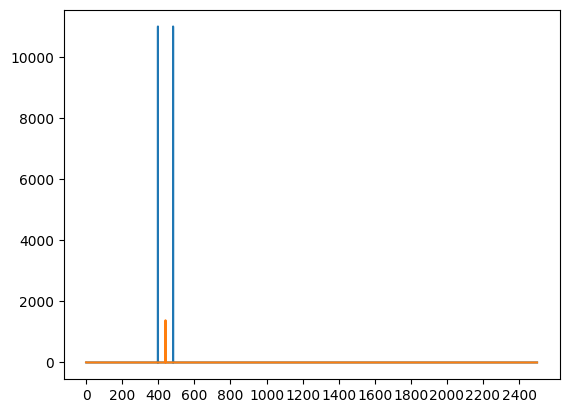

In [6]:
do_analysis(stimulus_assr)

In [7]:
stimulus_noise = NoiseTaggingTagger(audio,
                                    [(2, 6)],
                                    140,
                                    255)

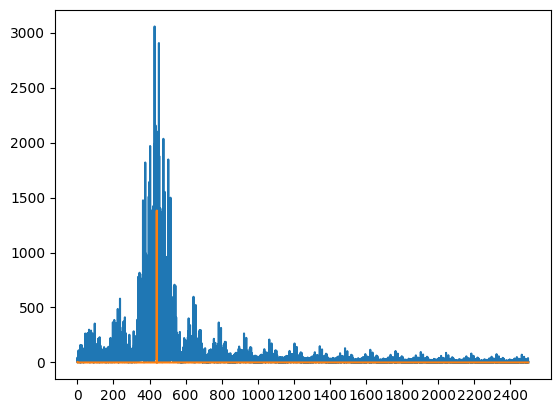

In [8]:
do_analysis(stimulus_noise)